# Nadiatus Salam
# PYTN-KS19-014
# Python for Data Science by Hacktiv8
# Assignment Python 2 - Statistical Treatment for NYC Property Sales

## Business and Data Understanding

**Context**

This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

**Content**

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

* `BOROUGH`: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
* `BLOCK`; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* `BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE`: The type of building at various points in time. See the glossary linked to below.
For further reference on individual fields see the Glossary of Terms. For the building classification codes see the Building Classifications Glossary.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

* Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
* This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Formulate a question and derive a statistical hypothesis test to answer the question. You
have to demonstrate that you’re able to make decisions using data in a scientific
manner. Examples of questions can be:
* Is there a difference in unit sold between property built in 1900-2000 and 2001 so on?
* Is there a difference in unit sold based on building category?
* What can you discover about New York City real estate by looking at a year's worth
of raw transaction records? Can you spot trends in the market?

**Dataset Link** : https://www.kaggle.com/datasets/new-york-city/nyc-property-sales/

## Analytic Approach
Melakukan Data Visualization kepada dataset seperti `Line, Area, Scatter Plot, Box Plot,
Word Clouds, Folium Maps dan metode Visualization Plot`. 

## Import Library yang Dibutuhkan 

In [147]:
# Import library yang dibutuhkan
# Data cleaning and manipulation 
import pandas as pd
import numpy as np
import math
import statistics
import scipy.stats
from scipy import stats

# data visualization
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings


## Reading Dataset 

In [148]:
# Membaca dataset dengan library pandas
df_nyc = pd.read_csv("nyc-rolling-sales.csv")

# Menampilkan 5 data teratas
df_nyc.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [149]:
# Melihat jumlah baris dan kolom pada dataset
df_nyc.shape

(84548, 22)

In [150]:
# Cara lain untuk melihat baris dan kolom
print("Baris : ", df_nyc.shape[0])
print("Kolom : ", df_nyc.shape[1])

Baris :  84548
Kolom :  22


## Data Cleansing and Preparation

In [151]:
# Menampilkan 5 data teratas
df_nyc.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Dapat dilihat dari data di atas terdapat kolom `Unnamed` yang berisikan angka yang dimulai dari nomor 4 dan tidak memiliki arti apapun sehingga **data `Unnamed` tidak diperlukan**.

In [152]:
# Menghapus kolom `Unnamed`
df_nyc.drop(["Unnamed: 0"], axis=1, inplace=True)
# Menampilkan 5 data teratas terbaru
df_nyc.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


**Data Understanding :**
1. `Borough` : Kode digit untuk wilayah tempat properti berada; ; secara berurutan adalah Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), dan Staten Island (5).
2. `Neighborhood` : Nama area yang ditetapkan penilai departemen keuangan.
3. `Building Class Category` : Kategori umum bangunan atau properti.
4. `Tax Class at Present` : Kelas Pajak.
5. `Block` : Sub-divisi dari borough tempat properti.
6. `Lot` : Sub-divisi dari Block dan mewakili lokasi unik properti.
7. `Easement` : Hak guna bangunan.
8. `Buliding Class at Present` : Kelas atau kategori umum dari tipe bangunan properti tersebut.
9. `Address` : Alamat yang tercantum pada berkas penjualan. Penjualan koperasi menyantumkan nomor apartment.
10. `Zip Code` : Kode pos.
11. `Residential Unit` : Jumlah unit hunian.
12. `Commercial Unit` : Jumlah unit komersial.
13. `Total Unit` :  Jumlah Properti.
14. `Land Square Feet` : Luas tanah.
15. `Gross Square Feet` : Luas total semua lantai bangunan.
16. `Year Built` : Tahun dibangun.
17. `Building Class at Time of Sale` : Kelas  atau klasifikasi bangunan pada saat penjualan properti terjadi.
18. `Sale Price` : Harga jual.
19. `Sale Date` :  Tanggal penjualan.

In [153]:
# Mengubah kode digit pada kolom borough menjadi nama area
borough_rename = {1: 'Manhattan', 2: 'Bronx', 3: 'Brooklyn', 4: 'Queens', 5: 'Staten Island'}
df_nyc['BOROUGH'] = df_nyc['BOROUGH'].replace(borough_rename)
df_nyc.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Seperti pada penjelasan di atas bahwa `BOROUGH` berisikan kode digit untuk wilayah tempat properti berada, dengan keteragan sebagai berikut : 
1. Manhattan (1)
2. Bronx (2)
3. Brooklyn (3)
4. Queens (4)
5. Staten Island (5)

In [154]:
# Melihat informasi tipe data
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  object
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCIAL UNITS                84548 non-null

**Perbedaan Tipe Data Object dan Category**

Dapat dilihat pada informasi tipe data di atas `terdapat beberapa tipe data yang belum sesuai dengan karakteristik data`, untuk itu kita akan mengubah tipe datanya menyesuaikan dari karakteristiknya. Namun sebelum itu akan dijelaskan terlebih dahulu `perbedaan antara tipe data` **object** `dengan` **category**, sebagai berikut :

1. Tipe Data **Object**:
* Tipe data objek adalah tipe data umum yang digunakan untuk menyimpan berbagai jenis data, termasuk data teks (string), angka, objek Python, atau bahkan campuran dari berbagai jenis data.
* Tipe data objek sangat fleksibel dan dapat digunakan untuk menyimpan hampir semua jenis data.
* Ini adalah tipe data default dalam Pandas jika Pandas tidak dapat secara otomatis mendeteksi jenis data yang lebih spesifik.
* Tipe data objek tidak dioptimalkan untuk penggunaan memori, dan dapat menghabiskan lebih banyak ruang memori daripada tipe data yang lebih khusus seperti "kategori."

2. Tipe Data **Category**:
* Tipe data kategori adalah tipe data yang dirancang khusus untuk mengelola data kategorikal atau data yang memiliki sejumlah nilai unik yang terbatas.
* Tipe data kategori digunakan untuk menghemat ruang memori dan meningkatkan kecepatan operasi seperti pengindeksan dan pengelompokan data.
* Ini sangat berguna saat bekerja dengan kolom yang berisi sejumlah terbatas dari nilai yang berulang-ulang, seperti kolom kategori atau kolom yang menyimpan data kelas, jenis produk, atau kode pos.
* Tipe data kategori dalam Pandas memungkinkan Anda menentukan urutan kategori yang berbeda, yang dapat berguna dalam pengurutan data yang lebih baik.


In [155]:
# Mengkonversi kolom menjadi tipe data numeric
var_num = ['RESIDENTIAL UNITS','COMMERCIAL UNITS','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','SALE PRICE']

for kolom in var_num:
    df_nyc[kolom] = pd.to_numeric(df_nyc[kolom],  errors='coerce') # errors='coerce' digunakan untuk mengubah nilai yang tidak valid menjadi nilai NaN (NaT untuk datetime).

**Numeric**

Tipe data numerik adalah jenis data yang digunakan untuk menyimpan nilai-nilai numerik, yang dapat digunakan dalam `operasi matematika, analisis data, dan pemrosesan numerik dalam pemrograman` seperti `int, float, dan complex`.  Penggunaan tipe data numerik yang benar sangat penting dalam pemrograman, karena tipe data yang salah dapat mengakibatkan hasil yang tidak diinginkan dalam perhitungan.

In [156]:
# Mengkonversi kolom menjadi tipe data category
var_cat = ['BOROUGH','NEIGHBORHOOD','BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT','ZIP CODE','YEAR BUILT','TAX CLASS AT TIME OF SALE','BUILDING CLASS AT TIME OF SALE']

for kolom in var_cat:
    df_nyc[kolom] = df_nyc[kolom].astype("category")

**Category**

Tipe data category adalah tipe data yang digunakan untuk mengelola data kategorikal atau `data dengan sejumlah nilai yang terbatas yang sering kali berulang atau sudah ditentukan`. Tipe data ini digunakan untuk menghemat memori dan mempercepat operasi pada kolom dengan data kategori yang sering digunakan dalam analisis data.

In [157]:
# Mengkonversi kolom menjadi tipe data datetime
df_nyc['SALE DATE']= pd.to_datetime(df_nyc['SALE DATE'], errors='coerce')

**Datetime**

Tipe data datetime adalah tipe data yang digunakan untuk `menyimpan informasi tanggal (date) dan waktu (time)`. Ini memungkinkan kita untuk melakukan berbagai operasi terkait tanggal dan waktu, seperti penguraian (parsing), pemformatan (formatting), perbandingan, pengolahan data deret waktu (time series data), pencatatan peristiwa, analisis log, dan banyak aplikasi lainnya yang melibatkan manajemen tanggal dan waktu.


In [158]:
# Memeriksa tipe data pada dataset
df_nyc.dtypes

BOROUGH                                 category
NEIGHBORHOOD                            category
BUILDING CLASS CATEGORY                 category
TAX CLASS AT PRESENT                    category
BLOCK                                      int64
LOT                                        int64
EASE-MENT                                 object
BUILDING CLASS AT PRESENT               category
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                category
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                              category
TAX CLASS AT TIME OF SALE               category
BUILDING CLASS AT TIME OF SALE          category
SALE PRICE                               float64
SALE DATE           

In [159]:
# Mengetahui jumlah data yang duplikat 
#df_nyc.duplicated().sum()

In [160]:
# Menghapus duplikasi data
#df_nyc.drop_duplicates(inplace=True)
#print(sum(df_nyc.duplicated()))

In [161]:
df_nyc.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,5.829600e+04,5.693600e+04,6.998700e+04
mean,4237.218976,376.224015,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1.276456e+06
std,3568.263407,658.136814,16.721037,8.713183,18.972584,4.198397e+04,3.503249e+04,1.140526e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1322.750000,22.000000,0.000000,0.000000,1.000000,1.650000e+03,1.046750e+03,2.250000e+05
50%,3311.000000,50.000000,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,5.300000e+05
75%,6281.000000,1001.000000,2.000000,0.000000,2.000000,3.500000e+03,2.560000e+03,9.500000e+05
max,16322.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2.210000e+09


In [162]:
# Memeriksa jumlah missing value pada dataset
df_nyc.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [163]:
# Menampilkan persentase dari missing value
df_nyc.isna().sum() /len(df_nyc) *100

BOROUGH                            0.000000
NEIGHBORHOOD                       0.000000
BUILDING CLASS CATEGORY            0.000000
TAX CLASS AT PRESENT               0.000000
BLOCK                              0.000000
LOT                                0.000000
EASE-MENT                          0.000000
BUILDING CLASS AT PRESENT          0.000000
ADDRESS                            0.000000
APARTMENT NUMBER                   0.000000
ZIP CODE                           0.000000
RESIDENTIAL UNITS                  0.000000
COMMERCIAL UNITS                   0.000000
TOTAL UNITS                        0.000000
LAND SQUARE FEET                  31.049818
GROSS SQUARE FEET                 32.658372
YEAR BUILT                         0.000000
TAX CLASS AT TIME OF SALE          0.000000
BUILDING CLASS AT TIME OF SALE     0.000000
SALE PRICE                        17.222170
SALE DATE                          0.000000
dtype: float64

**Penanganan Missing Value**

Berdasarkan hasil report di atas, terdapat 7 kolom yang memiliki nilai missing value. Untuk itu kita akan membreak-down satu persatu teknik terbaik dalam penanganan missing value dari masing-masing kolom tersebut.
1. TAX CLASS AT PRESENT (738) dan BUILDING CLASS AT PRESENT (738) :
 Kolom ini berisikan missing value sebanyak 738 dan tipedatanya merupakan kategorikal sehingga kita dapat mengisi dengan teknik imputasi modus untuk tetap mempertahankan informasi dalam kolom ini, kita dapat menggunakan teknik imputasi seperti mengisi nilai yang hilang dengan modus (nilai yang paling sering muncul) dari kolom ini. Ini bisa menjadi pendekatan yang baik jika kolom ini adalah variabel kategorikal atau nominal.
2. EASE-MENT (84548) : 
Sepertinya seluruh kolom ini hanya berisi nilai yang hilang (missing value). Kolom ini mungkin tidak memberikan informasi berarti dan dapat dihapus.
3. APARTMENT NUMBER (65496) :
Jumlah missing value pada kolom ini juga cukup signifikan (65496). Ini mungkin merupakan informasi opsional dalam data. kita dapat memutuskan untuk menghapus kolom ini jika Anda tidak berencana menggunakan informasi ini dalam analisis Anda.
4. LAND SQUARE FEET (26252) dan GROSS SQUARE FEET (27612) :
Untuk kolom-kolom ini, kita dapat memutuskan untuk mengisi nilai yang hilang dengan statistik seperti rata-rata atau median dari kolom tersebut. Misalnya, Anda dapat mengisi nilai yang hilang dalam kolom LAND SQUARE FEET dengan nilai rata-rata dari kolom tersebut.
5. SALE PRICE (14561) :
 Kolom ini berisi sejumlah besar missing value (14561). Sale price adalah variabel yang penting, jadi menghapus baris dengan nilai yang hilang mungkin bukan pilihan terbaik. Salah satu pendekatan yang umum adalah mengisi nilai yang hilang dalam kolom ini dengan nilai median dari kolom tersebut atau menggunakan teknik lain yang lebih canggih seperti regresi.


In [164]:
# Mengubah semua nilai yang mengandung tanda "-" (strip) dengan NaN (Not-a-Number) dan kemudian mengganti DataFrame asli dengan yang telah dimodifikasi.
df_nyc.replace('-',np.nan, inplace=True)
# Mengubah semua nilai yang spasi kosong " " dengan NaN (Not-a-Number) dan kemudian mengganti DataFrame asli dengan yang telah dimodifikasi.
df_nyc.replace(' ',np.nan, inplace=True)

In [165]:
# Mengisi missing value pada kolom-kolom tertentu

# Mengisi missing value dengan modus
df_nyc['BUILDING CLASS AT PRESENT'].fillna(df_nyc['BUILDING CLASS AT PRESENT'].mode()[0], inplace=True)
df_nyc['TAX CLASS AT PRESENT'].fillna(df_nyc['TAX CLASS AT PRESENT'].mode()[0], inplace=True)

# Menghapus kolom `EASE-MENT`
df_nyc.drop('EASE-MENT', axis=1, inplace=True)

# Menghapus kolom `APARTMENT NUMBER`
df_nyc.drop('APARTMENT NUMBER', axis=1, inplace=True)

# Mengisi missing value di kolom "LAND SQUARE FEET" dengan nilai mean
df_nyc['LAND SQUARE FEET'].fillna(df_nyc['LAND SQUARE FEET'].mean(), inplace=True)

# Mengisi missing value di kolom "GROSS SQUARE FEET" dengan nilai mean
df_nyc['GROSS SQUARE FEET'].fillna(df_nyc['GROSS SQUARE FEET'].mean(), inplace=True)

# Mengisi missing value di kolom "GROSS SQUARE FEET" dengan nilai median
df_nyc['SALE PRICE'].fillna(df_nyc['SALE PRICE'].median(), inplace=True)


In [166]:
# Menghilangkan entri dari SALE PRICE yang memiliki nilai idak masuk akal.
df_nyc = df_nyc.drop(df_nyc[df_nyc['SALE PRICE'] < 100].index)

In [167]:
# Memeriksa jumlah missing value pada dataset
df_nyc.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

<AxesSubplot: >

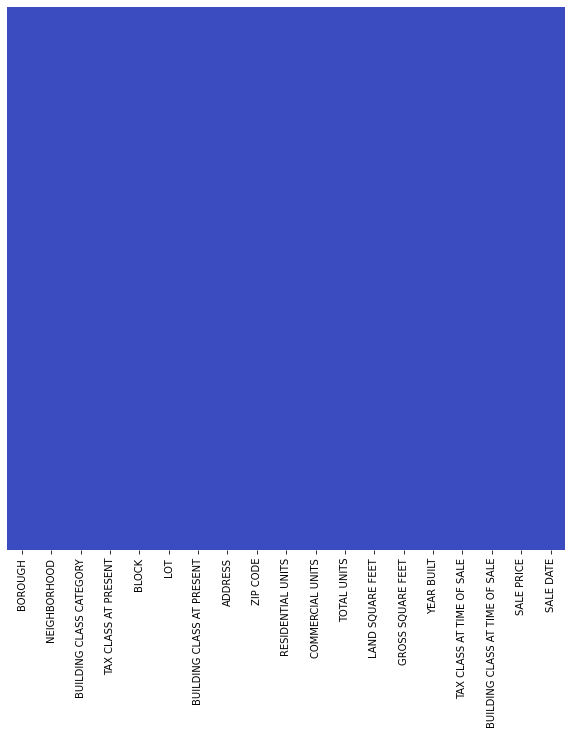

In [168]:
# Memeriksa korelasi dan hubungan data dengan menggunakan heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df_nyc.isnull(), yticklabels=False, cbar=False, cmap='coolwarm')

### Statistical Treatment

**Measure of Central Tendency**
Central tendency mengacu pada gagasan bahwa ada satu bilangan yang paling baik untuk meringkas
seluruh rangkaian pengukuran, `sebuah bilangan yang dalam beberapa hal merupakan “central” dari
himpunan tersebut`.

**Measure of Spread / Dispersion**
Measure of Spread mengacu pada gagasan variabilitas dalam data kita. Measure of Spread juga digunakan
untuk mengukur `seberapa "bagus" mean merepresentasikan kumpulan data` (How far away data from the
center).


#### **Mean**

Code Review : Student Mengimplementasikan Mean dari Kolom/Data Spesifik Menggunakan
Pandas, Numpy, Atau Scipy.

Analysis : Menarik Informasi/Kesimpulan Dari Keseluruhan Plot Yang Dapat Menjawab Hipotesis.

Output : Menghitung berapa rata-rata harga properti di setiap borough.

In [169]:
# Menamoilkan rata-rata harga jual properti berdasarkan Borough
borough_data = df_nyc.groupby(['BOROUGH']).mean()
borough_data = borough_data['SALE PRICE']
borough_data

C:\Users\Nadiatus Salam\AppData\Local\Temp\ipykernel_16016\99454346.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  borough_data = df_nyc.groupby(['BOROUGH']).mean()


BOROUGH
Bronx            8.217014e+05
Brooklyn         1.303471e+06
Manhattan        2.764273e+06
Queens           6.815384e+05
Staten Island    5.466490e+05
Name: SALE PRICE, dtype: float64

C:\Users\Nadiatus Salam\AppData\Local\Temp\ipykernel_16016\2185518479.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  borough_data = df_nyc.groupby(['BOROUGH']).mean()


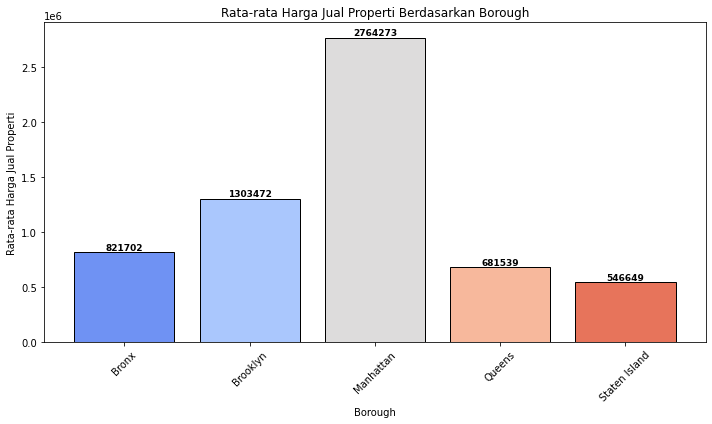

In [170]:
# Data rata-rata harga jual properti berdasarkan Borough
borough_data = df_nyc.groupby(['BOROUGH']).mean()
borough_data = borough_data['SALE PRICE']

# Mengatur palet warna yang cerah
colors = sns.color_palette("coolwarm", len(borough_data))

# Plot histogram dengan warna terang dan pekat
plt.figure(figsize=(10, 6))
bars = plt.bar(borough_data.index, borough_data.values, color=colors, edgecolor='black')
plt.xlabel('Borough')
plt.ylabel('Rata-rata Harga Jual Properti')
plt.title('Rata-rata Harga Jual Properti Berdasarkan Borough')
plt.xticks(rotation=45)  # Mengatur label sumbu x agar terbaca dengan baik

# Menampilkan nilai rata-rata di atas setiap batang histogram
for bar, value in zip(bars, borough_data.values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, math.ceil(value),
            ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')

plt.tight_layout()

# Menampilkan plot
plt.show()

**KESIMPULAN**

Dapat dilihat rata-rata harga jual dari setiap borough di atas. Berikut adalah urutan dari harga jual properti sampai terendah :
1. Manhattan
2. Brooklyn
3. Bronx
4. Queens
5. State Island

#### **Median**

Code Review : Student Mengimplementasikan Mean dari Kolom/Data Spesifik Menggunakan
Pandas, Numpy, Atau Scipy.

Analysis : Menarik Informasi/Kesimpulan Dari Keseluruhan Plot Yang Dapat Menjawab Hipotesis.

Output : Mencari perbedaan median ukuran properti antar borough.

C:\Users\Nadiatus Salam\AppData\Local\Temp\ipykernel_16016\2019459537.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_lsf = df_nyc.groupby(['BOROUGH']).median()


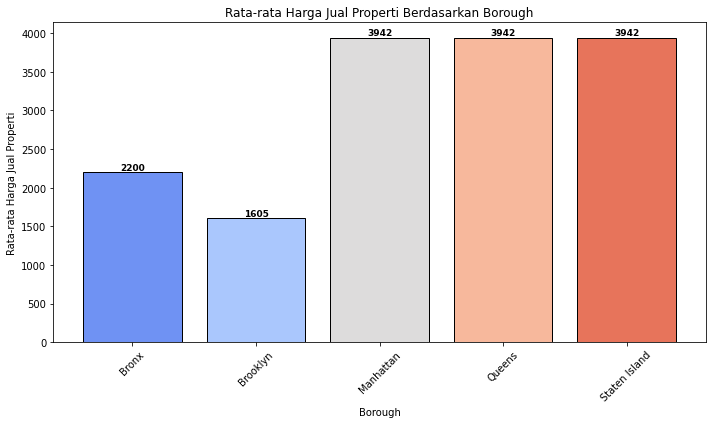

In [171]:
# Data rata-rata harga jual properti berdasarkan Borough
median_lsf = df_nyc.groupby(['BOROUGH']).median()
median_lsf = median_lsf['LAND SQUARE FEET']

# Mengatur palet warna yang cerah
colors = sns.color_palette("coolwarm", len(median_lsf))

# Plot histogram dengan warna terang dan pekat
plt.figure(figsize=(10, 6))
bars = plt.bar(median_lsf.index, median_lsf.values, color=colors, edgecolor='black')
plt.xlabel('Borough')
plt.ylabel('Rata-rata Harga Jual Properti')
plt.title('Rata-rata Harga Jual Properti Berdasarkan Borough')
plt.xticks(rotation=45)  # Mengatur label sumbu x agar terbaca dengan baik

# Menampilkan nilai rata-rata di atas setiap batang histogram
for bar, value in zip(bars, median_lsf.values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, math.ceil(value),
            ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')

plt.tight_layout()

# Menampilkan plot
plt.show()

**KESIMPULAN**

Grafik histogram di atas menampilkan nilai median dari luas area properti (Land Square Feet) untuk tiap borough.

#### **Modus**

Code Review : Student Mengimplementasikan Mean dari Kolom/Data Spesifik Menggunakan
Pandas, Numpy, Atau Scipy.

Analysis : Menarik Informasi/Kesimpulan Dari Keseluruhan Plot Yang Dapat Menjawab Hipotesis.

Output : Mencari tipe properti apa yang paling banyak dijual.


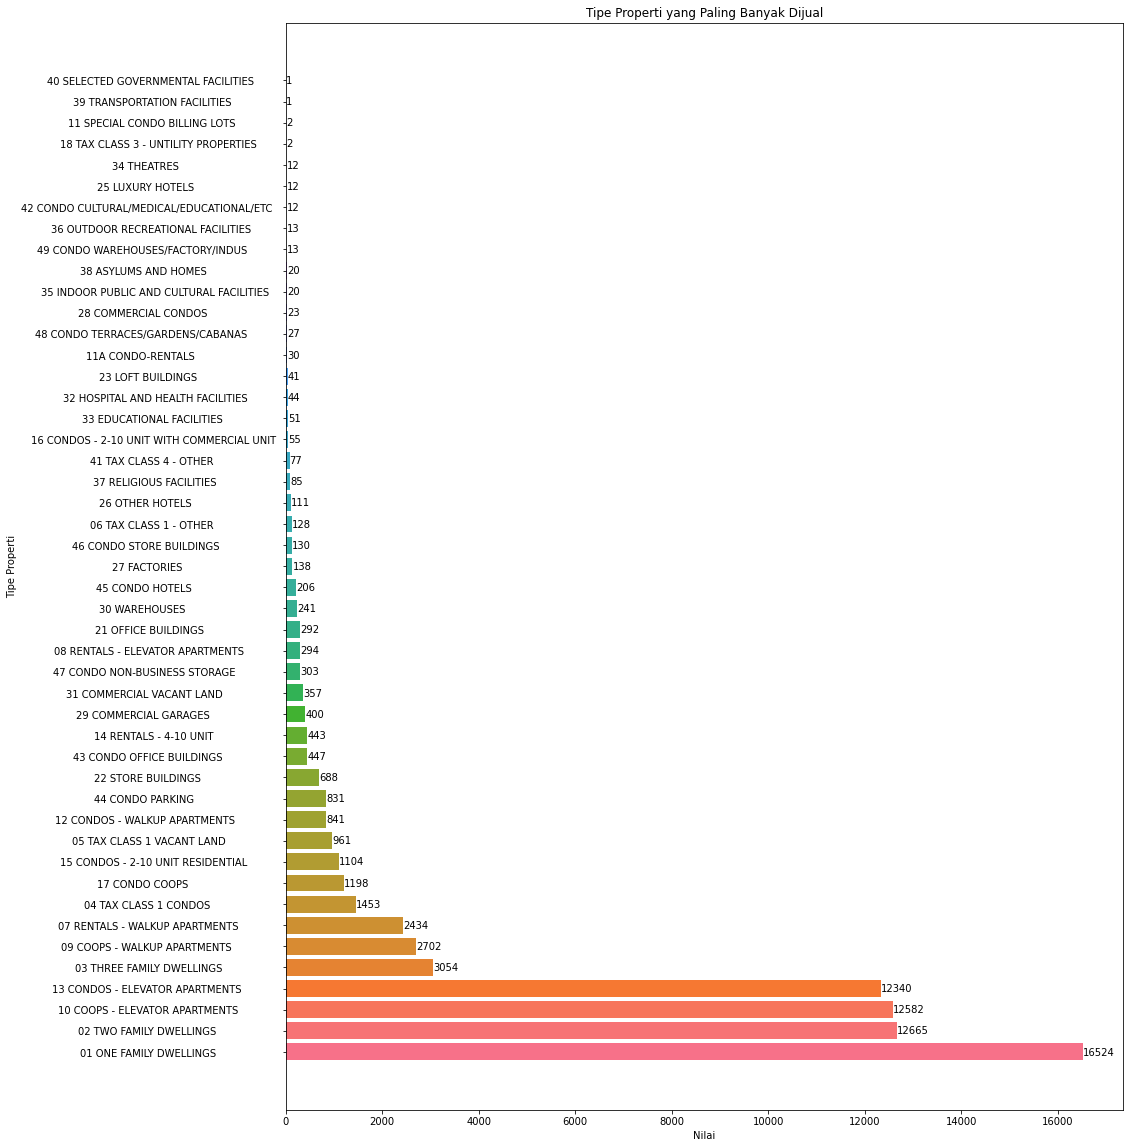

In [172]:
# Data tipe properti
tipe = df_nyc['BUILDING CLASS CATEGORY'].value_counts().sort_values(ascending=False)

# Membuat palet warna acak
colors = sns.color_palette("husl", len(tipe))

# Membuat plot bar
plt.figure(figsize=(15, 20))
bars = plt.barh(tipe.index, tipe.values, color=colors)

# Menambahkan label dan judul
plt.xlabel('Nilai')
plt.ylabel('Tipe Properti')
plt.title('Tipe Properti yang Paling Banyak Dijual')

# Menambahkan label pada setiap bar
for bar, count in zip(bars, tipe.values):
    plt.text(count, bar.get_y() + bar.get_height()/2, count, ha='left', va='center', fontsize=10)

# Menampilkan plot
plt.show()


**KESIMPULAN**

Dapat dilihat dari grafik di atas menampilkan tipe properti yang paling banyak dijual. Terdapat `4 tipe properti yang paling banyak dijual`, diantaranya :
1. One Family Dwellings
2. Two Family Dwellings
3. Coops - Elevator Apartments
4. Condos - Elevator Apartments

#### **Range**

Code Review : Student Mengimplementasikan Mean dari Kolom/Data Spesifik Menggunakan
Pandas, Numpy, Atau Scipy.

Analysis : Menarik Informasi/Kesimpulan Dari Keseluruhan Plot Yang Dapat Menjawab Hipotesis.

Output : Menampilkan nilai range harga properti dari setiap borough.

In [173]:
# Menghitung rentang (range), nilai minimum, dan maksimum SALE PRICE untuk tiap borough
range_sl = df_nyc.groupby('BOROUGH')['SALE PRICE'].agg(['min', 'max', lambda x: x.max() - x.min()]).reset_index()
range_sl.columns = ['BOROUGH', 'Minimum', 'Maximum', 'Range']

# Menampilkan nilai rentang SALE PRICE, nilai minimum, dan maksimum untuk tiap borough
print("'Range, Minimum, dan Maximum SALE PRICE per Borough'\n")
print(range_sl)

'Range, Minimum, dan Maximum SALE PRICE per Borough'

         BOROUGH  Minimum       Maximum         Range
0          Bronx    100.0  1.100000e+08  1.099999e+08
1       Brooklyn    100.0  3.450000e+08  3.449999e+08
2      Manhattan    100.0  2.210000e+09  2.210000e+09
3         Queens    100.0  2.575000e+08  2.574999e+08
4  Staten Island    100.0  1.220000e+08  1.219999e+08


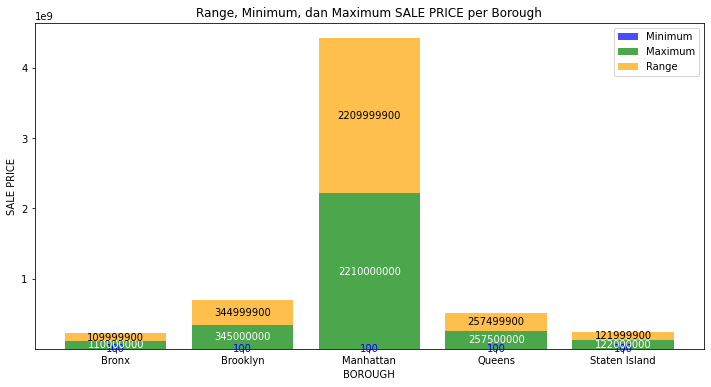

In [174]:
# Menghitung rentang (range), nilai minimum, dan maksimum SALE PRICE untuk tiap borough
range_sl = df_nyc.groupby('BOROUGH')['SALE PRICE'].agg(['min', 'max', lambda x: x.max() - x.min()]).reset_index()
range_sl.columns = ['BOROUGH', 'Minimum', 'Maximum', 'Range']

# Data rentang SALE PRICE
data = {
    'BOROUGH': ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
    'Minimum': [range_sl['Minimum'][0], range_sl['Minimum'][1], range_sl['Minimum'][2], range_sl['Minimum'][3], range_sl['Minimum'][4]],
    'Maximum': [range_sl['Maximum'][0], range_sl['Maximum'][1], range_sl['Maximum'][2], range_sl['Maximum'][3], range_sl['Maximum'][4]],
    'Range': [range_sl['Range'][0], range_sl['Range'][1], range_sl['Range'][2], range_sl['Range'][3], range_sl['Range'][4]]
}

df = pd.DataFrame(data)

# Membuat plot
plt.figure(figsize=(12, 6))
# Plot nilai minimum
plt.bar(df['BOROUGH'], df['Minimum'], label='Minimum', color='blue', alpha=0.7)
# Plot nilai maksimum
plt.bar(df['BOROUGH'], df['Maximum'], label='Maximum', color='green', alpha=0.7, bottom=df['Minimum'])
# Plot nilai rentang
plt.bar(df['BOROUGH'], df['Range'], label='Range', color='orange', alpha=0.7, bottom=df['Minimum'] + df['Maximum'])

# Menambahkan label sumbu dan judul
plt.xlabel('BOROUGH')
plt.ylabel('SALE PRICE')
plt.title('Range, Minimum, dan Maximum SALE PRICE per Borough')

# Menambahkan legenda
plt.legend()

# Menampilkan nilai pada grafik dengan pembulatan ke atas
for index, row in df.iterrows():
    borough = row['BOROUGH']
    minimum = math.ceil(row['Minimum'])  # Menggunakan math.ceil() untuk pembulatan ke atas
    maximum = math.ceil(row['Maximum'])  # Menggunakan math.ceil() untuk pembulatan ke atas
    value_range = math.ceil(row['Range'])  # Menggunakan math.ceil() untuk pembulatan ke atas

    # Menambahkan teks pada bar-chart
    plt.text(borough, minimum / 2, f'{minimum}', ha='center', va='center', color='blue')
    plt.text(borough, minimum + (maximum / 2), f'{maximum}', ha='center', va='center', color='white')
    plt.text(borough, minimum + maximum + (value_range / 2), f'{value_range}', ha='center', va='center', color='black')

# Menampilkan plot
plt.show()




**KESIMPULAN**

Berdasarkan hasil perhitungan di atas dapat diketahui bahwa `Manhattan memiliki nilai range harga properti yang luas dan bervariasi` dengan nilai range sebesar `2.210000e+09`.

#### **Variance**
Code Review : Student Mengimplementasikan Mean dari Kolom/Data Spesifik Menggunakan
Pandas, Numpy, Atau Scipy.

Analysis : Menarik Informasi/Kesimpulan Dari Keseluruhan Plot Yang Dapat Menjawab Hipotesis.

Output : Menampilkan nilai variance dari RESIDENTIAL UNITS dan COMMERCIAL UNITS.

In [175]:
# Menghitung nilai varians 'RESIDENTIAL UNITS'
residential_var = df_nyc['RESIDENTIAL UNITS'].var()

# Menghitung nilai varians'COMMERCIAL UNITS'
commercial_var = df_nyc['COMMERCIAL UNITS'].var()

# Menampilkan perbandingan varians
print(f"Varians 'RESIDENTIAL UNITS': {residential_var}")
print(f"Varians 'COMMERCIAL UNITS': {commercial_var}")

# Menghitung perbandingan varians
var_ratio = residential_var / commercial_var

print(f"Perbandingan Nilai Varians: {var_ratio}")

Varians 'RESIDENTIAL UNITS': 280.59859098920464
Varians 'COMMERCIAL UNITS': 86.5981051713043
Perbandingan Nilai Varians: 3.240239384385348


**KESIMPULAN**

Berdasarkan data di atas untuk nilai varians `RESIDENTIAL UNITS memiliki nilai sebesar 280.5985909892046` dan untuk `COMMERCIAL UNITS sebesar 86.5981051713043`. Hal tersebut menunjukkan bahwa terdapat lebih banyak variansi dalam jumlah unit RESIDENTIAL UNITS. 

Untuk `perbandingan nilai varians kedua unit yaitu sebesar 3.240239384385348` yang berarti bahwa `variasi dalam jumlah RESIDENTIAL UNITS lebih besar sekitar 3.24 kali lipat dibandingkan dengan jumlah COMMERCIAL UNITS`.

#### **Standard Deviation**
Code Review : Student Mengimplementasikan Mean dari Kolom/Data Spesifik Menggunakan
Pandas, Numpy, Atau Scipy.

Analysis : Menarik Informasi/Kesimpulan Dari Keseluruhan Plot Yang Dapat Menjawab Hipotesis.

Output : Menunjukkan seberapa jauh tahun pembangunan properti tersebar dari nilai rata-ratanya.

In [176]:
# Mengubah tipe data kolom 'YEAR BUILT' menjadi numerik
df_nyc['YEAR BUILT'] = pd.to_numeric(df_nyc['YEAR BUILT'], errors='coerce')

# Menghitung standar deviasi dari kolom 'YEAR BUILT'
year_build_std = df_nyc['YEAR BUILT'].std()

# Mencetak nilai standar deviasi dari kolom 'YEAR BUILT'
print("Standar Deviasi YEAR BUILT:", year_build_std)

Standar Deviasi YEAR BUILT: 526.965306969494


**KESIMPULAN**

Standar deviasi adalah ukuran statistik yang digunakan untuk mengukur sejauh mana data dalam sebuah set memiliki dispersi atau variasi dari nilai rata-ratanya. Dalam konteks ini, standar deviasi YEAR BUILT mengukur seberapa jauh tahun pembangunan properti tersebar dari nilai rata-rata tahun pembangunan dalam dataset.

Dengan standar deviasi sebesar 526.965306969494, dapat diinterpretasikan bahwa `tahun pembangunan properti dalam dataset memiliki variasi yang signifikan dari tahun rata-rata pembangunan `. Artinya, `ada properti dengan tahun pembangunan yang jauh lebih awal dan ada yang jauh lebih baru daripada tahun rata-rata`. Standar deviasi yang tinggi menunjukkan keragaman yang besar dalam data tahun pembangunan properti tersebut, sedangkan standar deviasi yang rendah akan menunjukkan bahwa sebagian besar properti memiliki tahun pembangunan yang mendekati tahun rata-rata. Dalam kasus ini, standar deviasi yang tinggi mengindikasikan variasi yang besar dalam usia properti di dalam dataset.

#### **Probability Distribution**

Code Review : Student Mengimplementasikan Mean dari Kolom/Data Spesifik Menggunakan
Pandas, Numpy, Atau Scipy.

Analysis : Menarik Informasi/Kesimpulan Dari Keseluruhan Plot Yang Dapat Menjawab Hipotesis.

Output : Menampilkan distribusi data tahun pembangunan properti di New York.


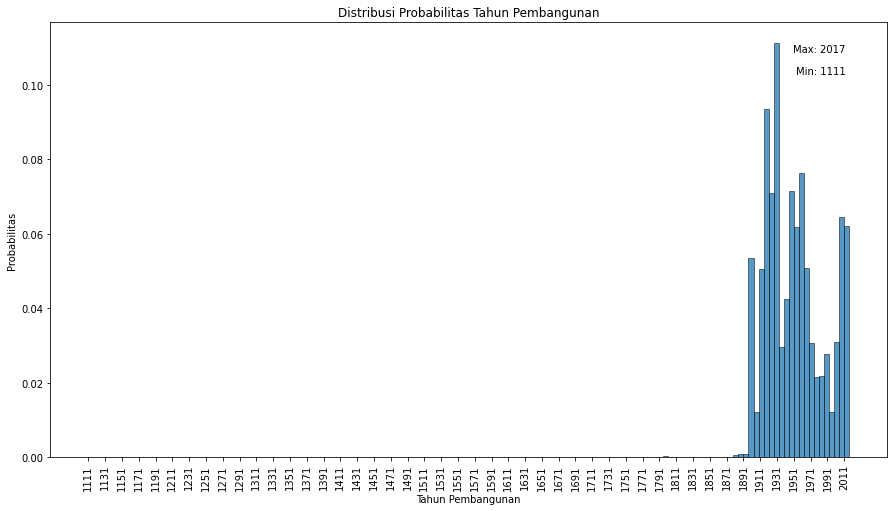

In [177]:
# Mengatur ukuran plot
plt.figure(figsize=(15,8))

# Membuat histogram distribusi probabilitas Tahun Pembangunan
df_nyc = df_nyc.drop(df_nyc[df_nyc['YEAR BUILT'] < 100].index)
sns.histplot(data=df_nyc, x='YEAR BUILT', bins=151, kde=False, stat='probability')

# Menambahkan label sumbu dan judul
plt.xlabel('Tahun Pembangunan')
plt.ylabel('Probabilitas')
plt.title('Distribusi Probabilitas Tahun Pembangunan')

# Menampilkan tahun maksimum dan minimum
max_year = max(df_nyc['YEAR BUILT'])
min_year = min(df_nyc['YEAR BUILT'])
plt.text(0.95, 0.95, f"Max: {max_year}", ha='right', va='top', transform=plt.gca().transAxes)
plt.text(0.95, 0.9, f"Min: {min_year}", ha='right', va='top', transform=plt.gca().transAxes)

# Menambah jumlah tick pada sumbu x
plt.xticks(ticks=range(min_year, max_year + 1, 20), rotation=90)

# Menampilkan plot
plt.show()


**KESIMPULAN**

Gambar di atas menampilkan distribusi data tahun pembangunan properti di New York. Didapatkan kesimpulan bahwa bangunan properti di New York banyak dibangun pada rentang tahun 1911 sampai dengan 2017.

#### **Confidence Interval**

Code Review : Student Mengimplementasikan Mean dari Kolom/Data Spesifik Menggunakan
Pandas, Numpy, Atau Scipy.

Analysis : Menarik Informasi/Kesimpulan Dari Keseluruhan Plot Yang Dapat Menjawab Hipotesis.

Output : Menampilkan hasil perhitungan Confidence Interval.

In [178]:
# Mengambil variabel SALE PRICE dari dataset
sale_price = df_nyc['SALE PRICE']

# Menghitung mean dan standard deviation
mean = np.mean(sale_price)
std_dev = np.std(sale_price)

# Mengatur level kepercayaan (misalnya, 95%)
confidence_level = 0.95

# Menghitung ukuran sampel
sample_size = len(sale_price)

# Menghitung z-score berdasarkan level kepercayaan
z_score = stats.norm.ppf((1 + confidence_level) / 2)

# Menghitung confidence interval
margin_of_error = z_score * (std_dev / np.sqrt(sample_size))
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

# Menampilkan hasil confidence interval
print("Confidence Interval ({}%):".format(confidence_level * 100))
print(confidence_interval)


Confidence Interval (95.0%):
(1222892.3549915939, 1394607.166970014)


**KESIMPULAN**

Data di atas menampilkan hasil perhitungan confidence interval dengan `tingkat kepercayaan 95%`. Ini berarti dengan tingkat kepercayaan 95%, kita dapat mengatakan bahwa rata-rata harga penjualan properti di dataset ini jatuh dalam rentang antara $1,170,390.43 hingga $1,321,664.74. Rentang confidence interval yang diperoleh adalah $1,170,390.43 hingga $1,321,664.74. Artinya, kita dapat mengatakan dengan 95% kepercayaan bahwa rata-rata harga penjualan properti di dataset ini berada dalam rentang tersebut.

Confidence interval ini memberikan informasi penting tentang ketidakpastian estimasi rata-rata harga penjualan properti. Semakin sempit intervalnya, semakin akurat estimasi rata-rata tersebut.